In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from scipy import stats

from scipy.stats import skew,norm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Imputer,StandardScaler

In [2]:
##Import the Data

df_train =  pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(df_train.columns)
print(df_train.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### Column Description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


##### Based on the description provided I can see that the following are the numerical columns:

    
LotFrontage                           
LotArea                        
YearBuilt                       
YearRemodAdd                 
MasVnrArea                         
BsmtFinSF1                    
BsmtFinSF2                     
BsmtUnfSF                   
TotalBsmtSF                       
1stFlrSF                 
2ndFlrSF                      
LowQualFinSF                     
GrLivArea                            
BsmtFullBath                      
BsmtHalfBath                       
FullBath                               
HalfBath                             
Bedroom                       
Kitchen                         
TotRmsAbvGrd                        
Fireplaces                      
GarageYrBlt                               
GarageCars                         
GarageArea                      
WoodDeckSF                           
OpenPorchSF                          
EnclosedPorch                           
3SsnPorch                         
ScreenPorch                            
PoolArea                     
MiscVal                          
MoSold                  
YrSold                         

###### Based on the description provided, the following are categorical columns:

    
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1    
BsmtFinType2    
Heating
HeatingQC
CentralAir
Electrical        
KitchenQual
Functional    
FireplaceQu    
GarageType
GarageFinish    
GarageQual    
GarageCond
PavedDrive
PoolQC    
Fence    
MiscFeature
SaleType    
SaleCondition

In [6]:
## Check for duplicate ID's

print(len(df_train['Id']))
print(len(set(df_train['Id'])))


##So there are no duplicate Id's 

1460
1460


In [7]:
##Lets analyze the Target variable

In [9]:
##Here the SalePrice minimum vale is 34900 and not negetive. So we are good.
df_train['SalePrice'].describe(percentiles= [.05, .25, .5, .75, .95] )

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
95%      326100.000000
max      755000.000000
Name: SalePrice, dtype: float64

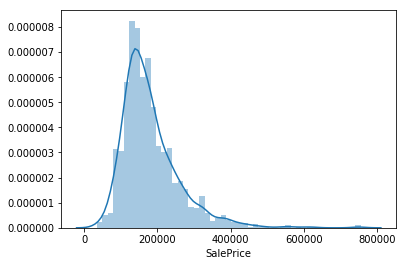

In [12]:

sns.distplot(df_train['SalePrice'])

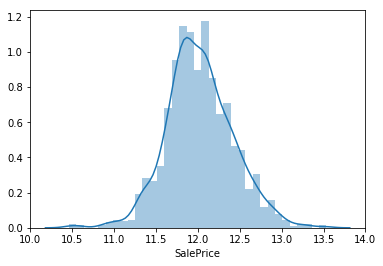

In [11]:
##check how the log of the target looks
sns.distplot(np.log(df_train['SalePrice']))

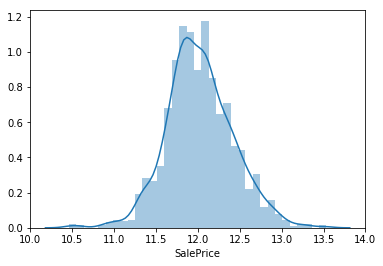

In [13]:
##check how the log of 1+target looks
sns.distplot(np.log( 1+ df_train['SalePrice']))

In [14]:
## Skewness of SalePrice (This is prositively skewed as evident in the graph )

print('Skewness of SalePrice : ', str(df_train['SalePrice'].skew()) )

##Kutosis of SalePrice (4th central moment)

print('Kurtosis of SalePrice : ',str(df_train['SalePrice'].kurt()))

Skewness of SalePrice :  1.8828757597682129
Kurtosis of SalePrice :  6.536281860064529


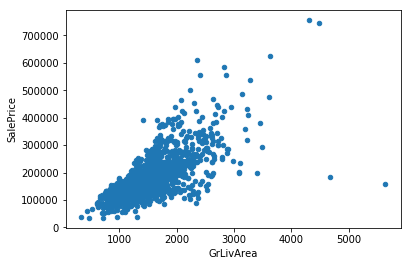

In [15]:
##Dependencies on Numerical Columns

col = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[col]],axis =1 )
data.plot.scatter(x = col , y = 'SalePrice')

In [16]:
##GrLivArea and SalePrice are linearly correlated

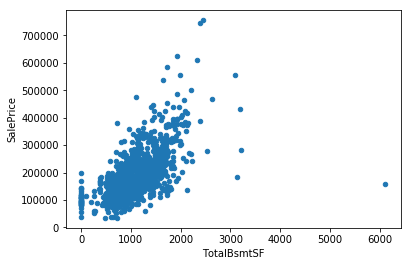

In [17]:
#scatter plot TotalBsmtSF/saleprice

col = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[col]],axis =1 )
data.plot.scatter(x = col , y = 'SalePrice')

In [18]:
##There is a strong linear correlation between TotalBsmtSF/saleprice

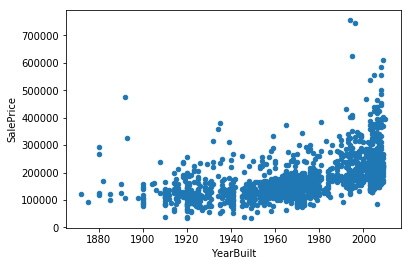

In [19]:


#scatter plot YearBuilt/saleprice

col = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[col]],axis =1 )
data.plot.scatter(x = col , y = 'SalePrice')

In [224]:
#There is not much relationship between YearBuilt and Sale Price. But newer houses tend to be sold at higher price

In [225]:
## Dependency on categorical features

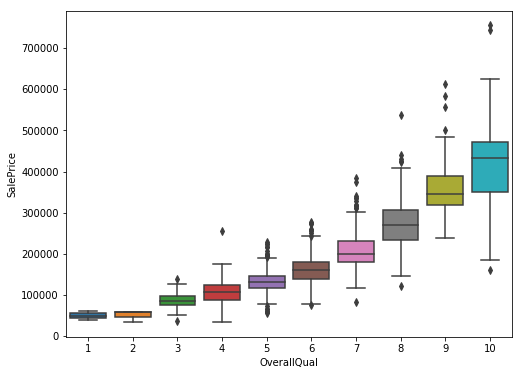

In [20]:

col = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[col]],axis =1 )
f, ax = plt.subplots(figsize = (8,6))
f = sns.boxplot(x = col , y = 'SalePrice',data = data)

In [21]:
## There is a corellation between OverallQual and SalePrice

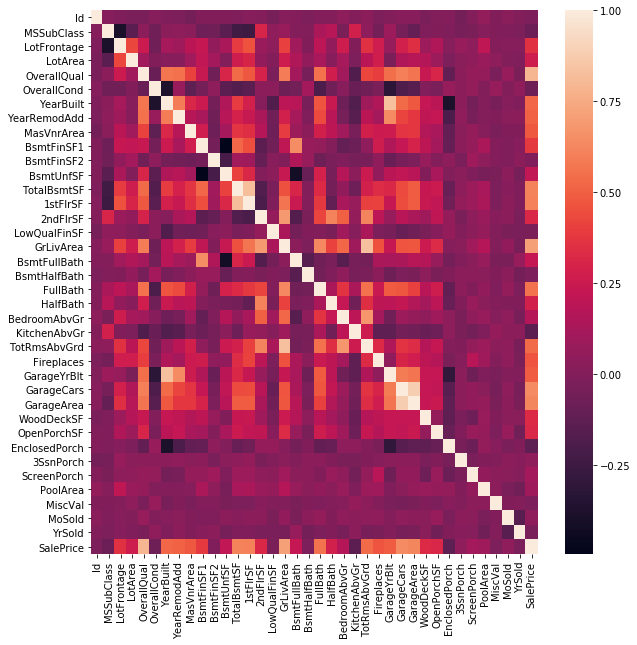

In [22]:
##Lets see the heatmap to check the impact of all the columns on the SalePrice

f, ax = plt.subplots(figsize = (10,10))
f = sns.heatmap(df_train.corr())

In [229]:
## We see here Garage Cars and garage Area is highly correlated

## TotalBsmtSF and 1stFlrSF is highly correlated

##YearBuilt and GarageYrBlt is correlated

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


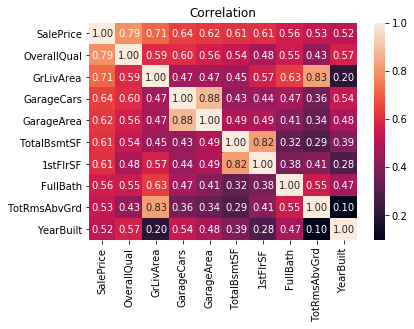

In [230]:
##SalePrice Correlation Matrix to show the top features that are related to the SalePrice

corrmat = df_train.corr()
top_k_corr = 10

cols= corrmat.nlargest(top_k_corr, 'SalePrice')['SalePrice'].index
print(cols)

sns.heatmap(df_train[cols].corr(),annot = True,fmt = '0.2f') 
plt.title('Correlation')
plt.show()

This clearly shows 'GarageCars' and 'GarageArea'  is correlated             
This also shows 'TotRmsAbvGrd' and 'GrLivArea' is correlated                 
SalePrice is dependent on OverallQual', 'GrLivArea' and 'TotalBsmtSF'                        
'TotalBsmtSF' and '1stFloor' also seem to be correlated                       
YearBuilt does have a impact on the SalePrice                      

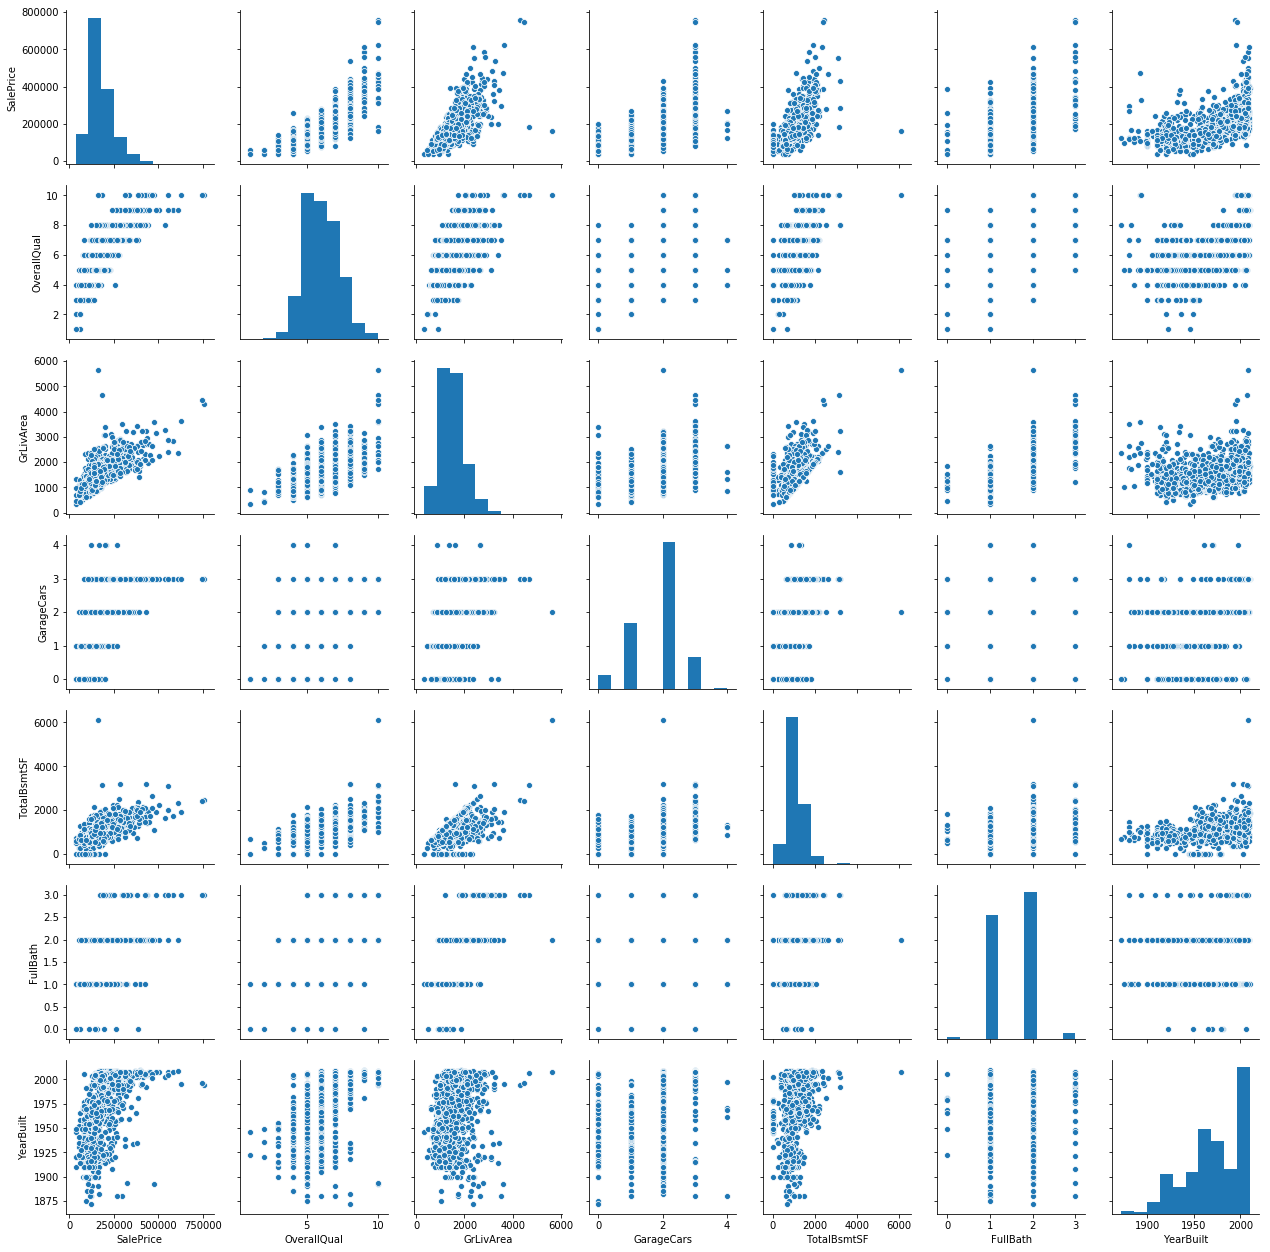

In [189]:
##Pairplot 

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(df_train[cols])
##sns.pairplot(df_train[cols], size = 2.5)

In [231]:
#df_train.count()


In [25]:
##Missing data

##1> Check the missing data


total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total,percent],axis =1 , keys = ['Total','Percent'])

missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
(missing_data[missing_data['Total'] > 1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [27]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,axis =1)
## Just delete one row where electical is NULL
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [28]:
## Check that there are no other missing rows

df_train.isnull().sum().max()

0

In [29]:
##So there are no other missing rows 

In [30]:
##Outliers in the Dataset





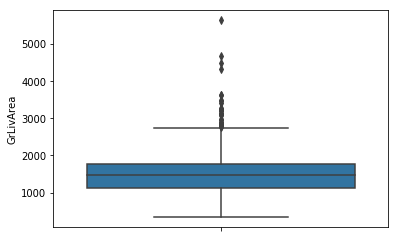

In [34]:
sns.boxplot(y=df_train['GrLivArea'])

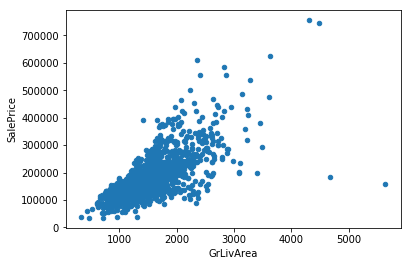

In [35]:
#bivariate analysis saleprice/grlivarea


col = 'GrLivArea'

data = pd.concat([df_train['SalePrice'], df_train[col]],axis=1)
data.plot.scatter(x =col, y ='SalePrice')

In [36]:
## Two points with high Ground Live Area has less Sale Price. So this is considered as Outlier. So we will remove them

df_train[(df_train['SalePrice'] <= 300000) & (df_train['GrLivArea'] > 4000)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [37]:
## Above 2 data points deleted

df_train = df_train.drop(df_train[(df_train['SalePrice'] <= 300000) & (df_train['GrLivArea'] > 4000)].index)

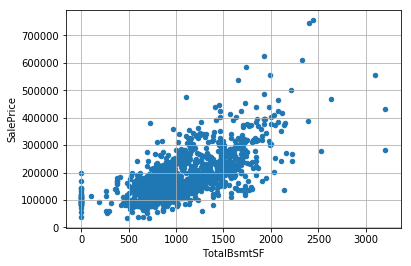

In [38]:
#bivariate analysis saleprice/TotalBsmtSF


col = 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'], df_train[col]],axis=1)
data.plot.scatter(x =col, y ='SalePrice',grid = True)

In [40]:
## Two points with high Ground Live Area has less Sale Price. So this is considered as Outlier. So we will remove thrm

df_train[(df_train['TotalBsmtSF'] > 3000)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,284000
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000


In [41]:
## Delete the 3 points

df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 3000)].index)

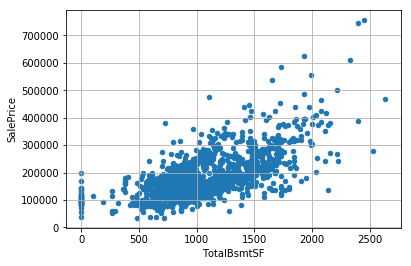

In [43]:
##confirm the data points are deleted
col = 'TotalBsmtSF'

data = pd.concat([df_train['SalePrice'], df_train[col]],axis=1)
data.plot.scatter(x =col, y ='SalePrice',grid = True)

##### Normality  Testing

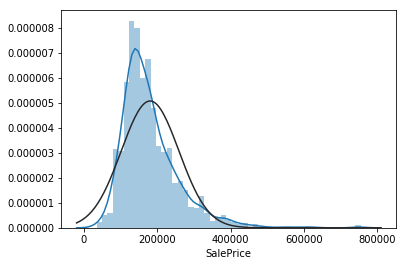

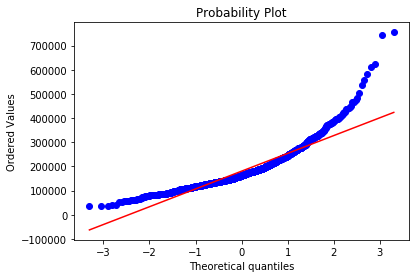

In [46]:
### Normality  Testing

sns.distplot(df_train['SalePrice'],fit= norm)
figure = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot = plt)

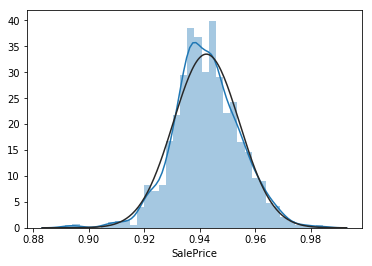

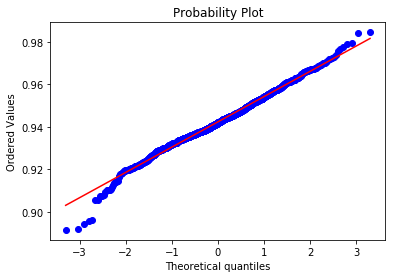

In [53]:
##SalePrice is Skewed to the right (Positively Skewed)

## Lets try transformation

#df_train['SalePrice']= np.log(df_train['SalePrice'])

sns.distplot(np.log(df_train['SalePrice']),fit = norm)

figure = plt.figure()
fig = stats.probplot(np.log(df_train['SalePrice']),plot = plt)

In [ ]:
## Much better now

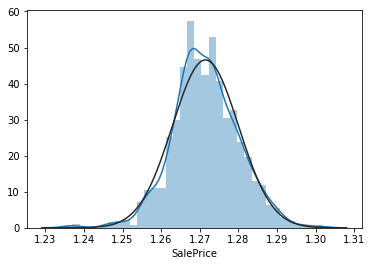

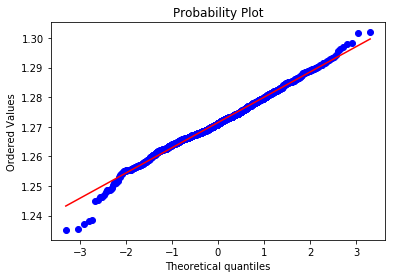

In [52]:
##Lets try log(1+ Saleprice)



sns.distplot(np.log(1+ df_train['SalePrice']),fit = norm)

figure = plt.figure()
fig = stats.probplot(np.log(1+ df_train['SalePrice']),plot = plt)

In [50]:
## Now update the data with the log values since it seems to be normalizing the sale price well.

df_train['SalePrice']= np.log(1+ df_train['SalePrice'])

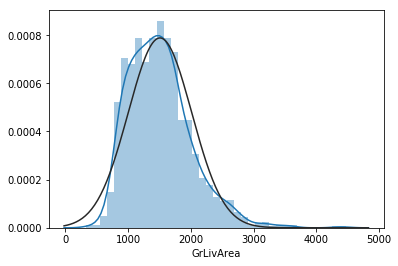

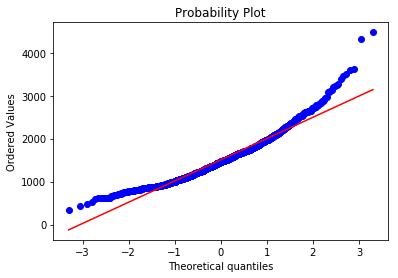

In [54]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

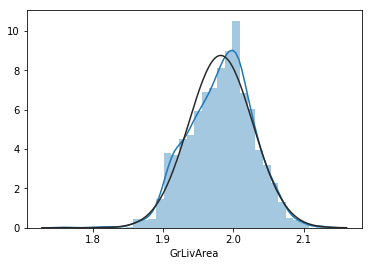

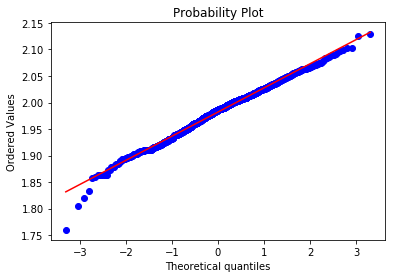

In [56]:


#transformed histogram and probability plot
sns.distplot(np.log(df_train['GrLivArea']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(df_train['GrLivArea']), plot=plt)

In [57]:
## Update the column since the transformation worked well
df_train['GrLivArea'] =  np.log(df_train['GrLivArea'])

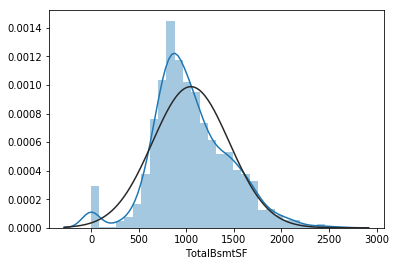

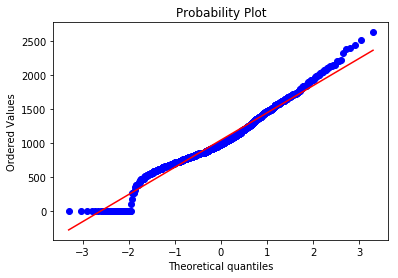

In [58]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)


In [69]:
##A lot of data points has Total Basement Square feet as 0

##A significant number of observations with value zero (houses without basement).
##A big problem because the value zero doesn't allow us to do log transformations.

df_train['HasBsmt'] = 0

##Update only the rows where the condition matches
df_train.loc[df_train['TotalBsmtSF']> 0,'HasBsmt']= 1





In [71]:
df_train['HasBsmt'].value_counts()

1    1417
0      37
Name: HasBsmt, dtype: int64

In [72]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

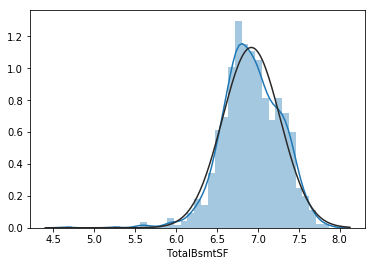

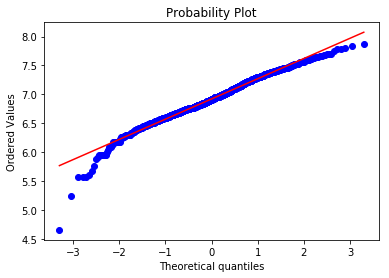

In [73]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [76]:
##THis worked well on TotalBsmtSF

In [298]:
### homoscedasticity

In [61]:
### Bivariate analysis

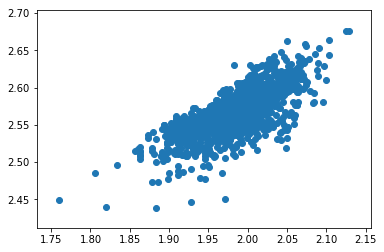

In [74]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

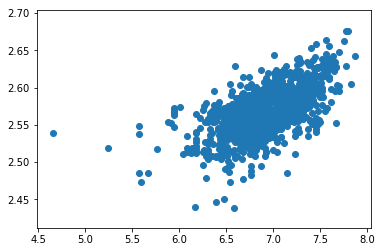

In [75]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

#################################################################################################

## Another way (2nd way) to look at the same problem

In [1]:
#Here we will start with importing the data and play with it once again in a different flavour

In [1]:
## Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
## Linear, L1 , L2 and (both L1,L2) regression
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%0.2f' %x)

In [3]:
## Read the data

df_train = pd.read_csv('train.csv')
print(df_train.shape)

(1460, 81)


In [4]:
print(len(df_train['Id']))
print(len(set(df_train['Id'])))

1460
1460


In [5]:
# Drop Id column
df_train.drop("Id", axis = 1, inplace = True)

In [6]:
## Above 2 data points deleted

df_train = df_train.drop(df_train[(df_train['SalePrice'] <= 300000) & (df_train['GrLivArea'] > 4000)].index)

In [7]:
df_train .shape

(1458, 80)

In [8]:
# Log transform the target for official scoring

df_train['SalePrice'] = np.log(1 + df_train['SalePrice'] )
#df_train['SalePrice'] = np.log(df_train['SalePrice'] )
y = df_train['SalePrice'] 

In [9]:
##Missing data

##1> Check the missing data


total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total,percent],axis =1 , keys = ['Total','Percent'])

missing_data.head(25)

,Total,Percent
PoolQC,1452,1.00
MiscFeature,1404,0.96
Alley,1367,0.94
Fence,1177,0.81
FireplaceQu,690,0.47
LotFrontage,259,0.18
GarageType,81,0.06
GarageCond,81,0.06
GarageFinish,81,0.06
GarageQual,81,0.06


In [10]:
df_train['ExterCond'].value_counts()

TA    1280
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [11]:
# Handle missing values for features where median/mean or most common value doesn't make sense

In [12]:
# Alley : data description says NA means "no alley access"
df_train["Alley"].fillna("None", inplace = True)

# BedroomAbvGr : NA most likely means 0
df_train["BedroomAbvGr"].fillna(0, inplace = True)

# BsmtQual etc : data description says NA for basement features is "no basement"
df_train['BsmtQual'].fillna('No', inplace = True)
df_train['BsmtCond'].fillna('No', inplace = True)
df_train['BsmtExposure'].fillna('No', inplace = True)
df_train['BsmtFinType1'].fillna('No', inplace = True)
df_train['BsmtFinType2'].fillna('No', inplace = True)
df_train['BsmtFullBath'].fillna('No', inplace = True)
df_train['BsmtHalfBath'].fillna('No', inplace = True)
df_train['BsmtUnfSF'].fillna('No', inplace = True)

# CentralAir : NA most likely means No
df_train['CentralAir'].fillna('N', inplace = True)

# Condition : NA most likely means Normal
df_train['Condition1'].fillna('Norm', inplace = True)
df_train['Condition2'].fillna('Norm', inplace = True)

# EnclosedPorch : NA most likely means no enclosed porch
df_train['EnclosedPorch'].fillna(0, inplace = True)

# External stuff : NA most likely means average
df_train['ExterCond'].fillna('TA', inplace = True)
df_train['ExterQual'].fillna('TA', inplace = True)

# Fence : data description says NA means "no fence"
df_train['Fence'].fillna('No', inplace = True)

# FireplaceQu : data description says NA means "no fireplace"
df_train['FireplaceQu'].fillna('No', inplace = True)
df_train['Fireplaces'].fillna(0, inplace = True)

# Functional : data description says NA means typical
df_train['Functional'].fillna('Typ', inplace = True)

# GarageType etc : data description says NA for garage features is "no garage"
df_train['GarageType'].fillna('No', inplace = True)
df_train['GarageFinish'].fillna('No', inplace = True)
df_train['GarageQual'].fillna('No', inplace = True)
df_train['GarageCond'].fillna('No', inplace = True)
df_train['GarageArea'].fillna(0, inplace = True)
df_train['GarageCars'].fillna(0, inplace = True)

# HalfBath : NA most likely means no half baths above grade
df_train['HalfBath'].fillna(0, inplace = True)

# HeatingQC : NA most likely means typical
df_train['HeatingQC'].fillna('TA', inplace = True)

# KitchenAbvGr : NA most likely means 0
df_train['KitchenAbvGr'].fillna(0, inplace = True)

# KitchenQual : NA most likely means typical
df_train['KitchenQual'].fillna('TA', inplace = True)

# LotFrontage : NA most likely means no lot frontage
df_train['LotFrontage'].fillna(0, inplace = True)

# LotShape : NA most likely means regular
df_train['LotShape'].fillna('Reg', inplace = True)

# MasVnrType : NA most likely means no veneer
df_train["MasVnrType"].fillna("None", inplace = True)
df_train['MasVnrArea'].fillna(0, inplace = True)

# MiscFeature : data description says NA means "no misc feature"
df_train['MiscFeature'].fillna('No', inplace = True)
df_train['MiscVal'].fillna(0, inplace = True)

# OpenPorchSF : NA most likely means no open porch
df_train['OpenPorchSF'].fillna(0, inplace = True)

# PavedDrive : NA most likely means not paved
df_train['PavedDrive'].fillna('N', inplace = True)

# PoolQC : data description says NA means "no pool"
df_train['PoolQC'].fillna('No', inplace = True)
df_train['PoolArea'].fillna(0, inplace = True)

# SaleCondition : NA most likely means normal sale
df_train['SaleCondition'].fillna('Normal', inplace = True)

# ScreenPorch : NA most likely means no screen porch
df_train['ScreenPorch'].fillna(0, inplace = True)

# TotRmsAbvGrd : NA most likely means 0
df_train['TotRmsAbvGrd'].fillna(0, inplace = True)

# Utilities : NA most likely means all public utilities
df_train['Utilities'].fillna('Utilities', inplace = True)

# WoodDeckSF : NA most likely means no wood deck
df_train['WoodDeckSF'].fillna(0, inplace = True)

In [13]:
# Some numerical features are actually really categories
df_train = df_train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [14]:
# Encode some categorical features as ordered numbers when there is information in the order
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

Then we will create new features, in 3 ways :
    
Simplifications of existing features

Combinations of existing features

Polynomials on the top 10 existing features

In [15]:
# Create new features
# 1* Simplifications of existing features
df_train["SimplOverallQual"] = df_train['OverallQual'].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

df_train["SimplOverallCond"] = df_train['OverallCond'].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

df_train["SimplPoolQC"] = df_train['PoolQC'].replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

df_train["SimplGarageCond"] = df_train['GarageCond'].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

df_train["SimplGarageQual"] = df_train['GarageQual'].replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

df_train["SimplFireplaceQu"] = df_train['FireplaceQu'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

df_train["SimplFireplaceQu"] = df_train['FireplaceQu'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

df_train["SimplFunctional"] = df_train['Functional'].replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

df_train["SimplKitchenQual"] = df_train['KitchenQual'].replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

df_train["SimplHeatingQC"] = df_train['HeatingQC'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

df_train["SimplBsmtFinType1"] = df_train['BsmtFinType1'].replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

df_train["SimplBsmtFinType2"] = df_train['BsmtFinType2'].replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

df_train["SimplBsmtCond"] = df_train['BsmtCond'].replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

df_train["SimplBsmtQual"] = df_train['BsmtQual'].replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

df_train["SimplExterCond"] = df_train['ExterCond'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

df_train["SimplExterQual"] = df_train['ExterQual'].replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]
# Overall quality of the garage
df_train["GarageGrade"] = df_train["GarageQual"] * df_train["GarageCond"]
# Overall quality of the exterior
df_train["ExterGrade"] = df_train["ExterQual"] * df_train["ExterCond"]
# Overall kitchen score
df_train["KitchenScore"] = df_train["KitchenAbvGr"] * df_train["KitchenQual"]
# Overall fireplace score
df_train["FireplaceScore"] = df_train["Fireplaces"] * df_train["FireplaceQu"]
# Overall garage score
df_train["GarageScore"] = df_train["GarageArea"] * df_train["GarageQual"]
# Overall pool score
df_train["PoolScore"] = df_train["PoolArea"] * df_train["PoolQC"]
# Simplified overall quality of the house
df_train["SimplOverallGrade"] = df_train["SimplOverallQual"] * df_train["SimplOverallCond"]
# Simplified overall quality of the exterior
df_train["SimplExterGrade"] = df_train["SimplExterQual"] * df_train["SimplExterCond"]
# Simplified overall pool score
df_train["SimplPoolScore"] = df_train["PoolArea"] * df_train["SimplPoolQC"]
# Simplified overall garage score
df_train["SimplGarageScore"] = df_train["GarageArea"] * df_train["SimplGarageQual"]
# Simplified overall fireplace score
df_train["SimplFireplaceScore"] = df_train["Fireplaces"] * df_train["SimplFireplaceQu"]
# Simplified overall kitchen score
df_train["SimplKitchenScore"] = df_train["KitchenAbvGr"] * df_train["SimplKitchenQual"]
# Total number of bathrooms
df_train["TotalBath"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + \
df_train["FullBath"] + (0.5 * df_train["HalfBath"])
# Total SF for house (incl. basement)
df_train["AllSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df_train["AllFlrsSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]
# Total SF for porch
df_train["AllPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + \
df_train["3SsnPorch"] + df_train["ScreenPorch"]
# Has masonry veneer or not
df_train["HasMasVnr"] = df_train['MasVnrType'].replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
df_train["BoughtOffPlan"] = df_train['SaleCondition'].replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [16]:
# most important features relative to target

print('Most Important features to predict the SalePrice')

corr = df_train.corr()


corr.sort_values(['SalePrice'],ascending = False, inplace = True)
print(corr.SalePrice)

Most Important features to predict the SalePrice
SalePrice            1.00
OverallQual          0.82
AllSF                0.82
AllFlrsSF            0.74
GrLivArea            0.73
SimplOverallQual     0.71
ExterQual            0.68
GarageCars           0.68
TotalBath            0.68
KitchenQual          0.67
GarageScore          0.66
GarageArea           0.66
TotalBsmtSF          0.65
SimplExterQual       0.64
SimplGarageScore     0.63
1stFlrSF             0.62
BsmtQual             0.62
SimplKitchenQual     0.61
OverallGrade         0.61
FullBath             0.60
SimplBsmtQual        0.59
ExterGrade           0.59
YearBuilt            0.59
YearRemodAdd         0.57
FireplaceQu          0.55
GarageYrBlt          0.54
TotRmsAbvGrd         0.54
SimplOverallGrade    0.52
FireplaceScore       0.52
SimplKitchenScore    0.52
                     ... 
BedroomAbvGr         0.21
SimplBsmtCond        0.20
AllPorchSF           0.20
LotFrontage          0.18
SimplFunctional      0.14
Functional     

In [17]:
# Create new features
# 3* Polynomials (square, cube, square root) on the top 10 existing features

df_train["OverallQual-s2"] = df_train["OverallQual"] ** 2
df_train["OverallQual-s3"] = df_train["OverallQual"] ** 3
df_train["OverallQual-Sq"] = np.sqrt(df_train["OverallQual"])
df_train["AllSF-2"] = df_train["AllSF"] ** 2
df_train["AllSF-3"] = df_train["AllSF"] ** 3
df_train["AllSF-Sq"] = np.sqrt(df_train["AllSF"])
df_train["AllFlrsSF-2"] = df_train["AllFlrsSF"] ** 2
df_train["AllFlrsSF-3"] = df_train["AllFlrsSF"] ** 3
df_train["AllFlrsSF-Sq"] = np.sqrt(df_train["AllFlrsSF"])
df_train["GrLivArea-2"] = df_train["GrLivArea"] ** 2
df_train["GrLivArea-3"] = df_train["GrLivArea"] ** 3
df_train["GrLivArea-Sq"] = np.sqrt(df_train["GrLivArea"])
df_train["SimplOverallQual-s2"] = df_train["SimplOverallQual"] ** 2
df_train["SimplOverallQual-s3"] = df_train["SimplOverallQual"] ** 3
df_train["SimplOverallQual-Sq"] = np.sqrt(df_train["SimplOverallQual"])
df_train["ExterQual-2"] = df_train["ExterQual"] ** 2
df_train["ExterQual-3"] = df_train["ExterQual"] ** 3
df_train["ExterQual-Sq"] = np.sqrt(df_train["ExterQual"])
df_train["GarageCars-2"] = df_train["GarageCars"] ** 2
df_train["GarageCars-3"] = df_train["GarageCars"] ** 3
df_train["GarageCars-Sq"] = np.sqrt(df_train["GarageCars"])
df_train["TotalBath-2"] = df_train["TotalBath"] ** 2
df_train["TotalBath-3"] = df_train["TotalBath"] ** 3
df_train["TotalBath-Sq"] = np.sqrt(df_train["TotalBath"])
df_train["KitchenQual-2"] = df_train["KitchenQual"] ** 2
df_train["KitchenQual-3"] = df_train["KitchenQual"] ** 3
df_train["KitchenQual-Sq"] = np.sqrt(df_train["KitchenQual"])
df_train["GarageScore-2"] = df_train["GarageScore"] ** 2
df_train["GarageScore-3"] = df_train["GarageScore"] ** 3
df_train["GarageScore-Sq"] = np.sqrt(df_train["GarageScore"])

In [18]:
# Differentiate numerical features (minus the target) and categorical features

categorical_features  = df_train.select_dtypes(include = ["object"]).columns
numerical_features = df_train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop('SalePrice')

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

train_num = df_train[numerical_features]
train_cat = df_train[categorical_features]


Numerical features : 116
Categorical features : 27


In [19]:
# Handle remaining missing values for numerical features by using median as replacement

print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

train_num.fillna(train_num.median(),inplace = True)

print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 81


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Remaining NAs for numerical features in train : 0


In [20]:
##skewed_feats = train_num.apply(lambda x: skew(x.dropna())) here we are dropping NULL to evaludate skewness
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")


skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])  ## log1p = log(1+ feature value)

87 skewed numerical features to log transform


C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
train_cat.isnull().sum().sort_values(ascending = False).head(5)

Electrical       1
SaleCondition    0
Exterior1st      0
MSZoning         0
Alley            0
dtype: int64

In [22]:
train_cat['Electrical'].mode()

0    SBrkr
dtype: object

In [23]:
#train_cat['Electrical'].fillna('SBrkr',inplace = True)

In [24]:
train_cat.isnull().sum().sort_values(ascending = False).head(5)

Electrical       1
SaleCondition    0
Exterior1st      0
MSZoning         0
Alley            0
dtype: int64

In [25]:
# Create dummy features for categorical values via one-hot encoding

print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 1
Remaining NAs for categorical features in train : 0


In [26]:
### Join categorical and numerical features

train = pd.concat([train_num,train_cat], axis =1)
print("New number of features : " + str(train.shape[1]))


# Partition the dataset in train + validation sets

X_train, X_valid, y_train, y_valid = train_test_split(train,y,test_size = 0.25, random_state = 1,shuffle= True)

New number of features : 323


In [27]:
# Partition the dataset in train + validation sets
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size = 0.3, random_state = 0)

In [28]:
print("X_train : " + str(X_train.shape))
print("X_valid : " + str(X_valid.shape))
print("y_train : " + str(y_train.shape))
print("y_valid : " + str(y_valid.shape))

X_train : (1020, 323)
X_valid : (438, 323)
y_train : (1020,)
y_valid : (438,)


In [29]:
print(np.any(np.isnan(X_train)))  ## this should be False
print(np.all(np.isfinite(X_train))) ##This should be True

False
True


In [30]:
# Standardize numerical features
##Here we have used only the train data to standardize the columns

scale = StandardScaler()

X_train[numerical_features] = scale.fit_transform(X_train[numerical_features])
X_valid[numerical_features] = scale.transform(X_valid[numerical_features])

C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Kaustav\Anaconda3\envs\keras\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [31]:
## Define the scoring function

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train_model(model):
    rmse = np.sqrt(-cross_val_score(model, X_train,y_train,scoring = scorer,cv=10))
    return rmse

def rmse_cv_valid_model(model):
    rmse = np.sqrt(-cross_val_score(model, X_valid,y_valid,scoring = scorer,cv=10))
    return rmse 



1* Linear Regression without regularization

In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(lr).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(lr).mean() )

y_train_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_valid)

RMSE on Train Set: 41974445.85771563
RMSE on Valid Set: 0.346316652474141


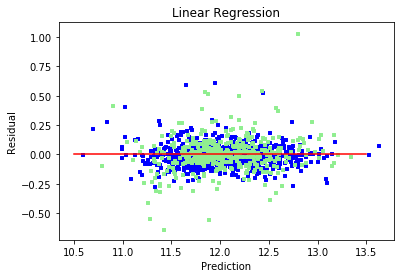

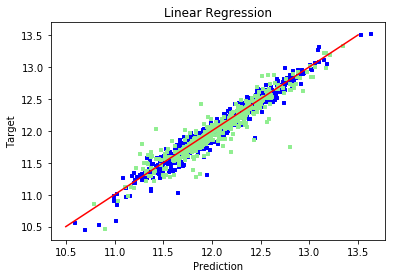

In [33]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [0.0, 0.0], c = "red")
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red") ## [starting x ,ending  x] [starting y ,ending  y]
plt.title('Linear Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

##### 2* Linear Regression with Ridge Regulerization (L2 penalty)

In [34]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas = [0.01,0.03,0.06,1,3,6,12,18,30,45,60])

ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('Best Alpha found till now', alpha)

Best Alpha found till now 18.0


In [35]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)

ridge.fit(X_train,y_train)

print('Best Alpha found :', ridge.alpha_)

Best Alpha found : 20.7


In [36]:
##Ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [38]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(ridge).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(ridge).mean() )

y_train_pred = ridge.predict(X_train)
y_valid_pred = ridge.predict(X_valid)



RMSE on Train Set: 0.113078980161798
RMSE on Valid Set: 0.12216321735293278


In [39]:
##RMSE is much lower for both Training and Validation with L2 Reguralization

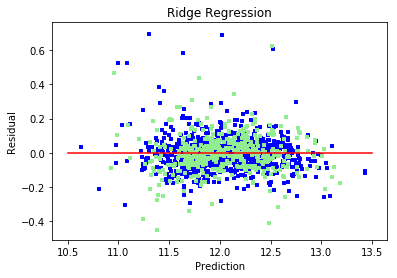

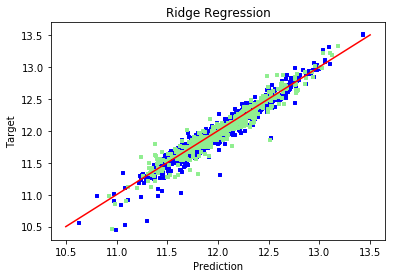

In [40]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

##### Plot important coefficients

In [43]:
# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  317 features and eliminated 6 features


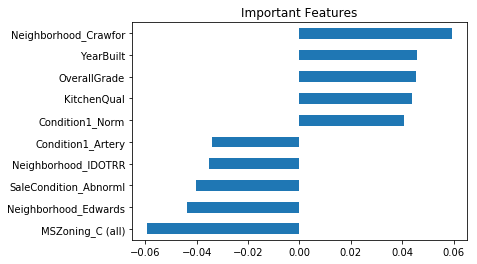

In [51]:
imp_coef = pd.concat([coefs.sort_values().head(), coefs.sort_values().tail()])
imp_coef.plot(kind = 'barh')
plt.title('Important Features')
plt.show()

##### 3* Linear Regression with Lasso regularization (L1 penalty)

In [55]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1,5,10], 
                max_iter = 100000, cv = 10)
lasso.fit(X_train,y_train)

alpha = lasso.alpha_
print('Best alpha found till now', alpha)

Best alpha found till now 0.0006


In [57]:
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)

lasso.fit(X_train,y_train)

print('Best Alpha found :', lasso.alpha_)

Best Alpha found : 0.00078


In [58]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(lasso).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(lasso).mean() )

y_train_pred = lasso.predict(X_train)
y_valid_pred = lasso.predict(X_valid)

RMSE on Train Set: 0.1126300219300284
RMSE on Valid Set: 0.11914186533895206


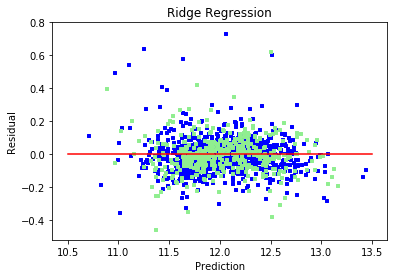

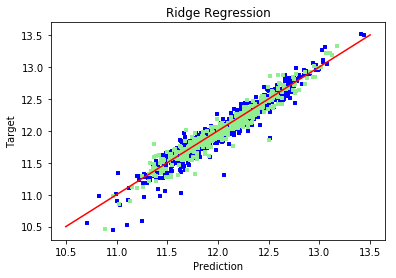

In [59]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

##### Plot Important Coefficient 

In [60]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  97 features and eliminated 226 features


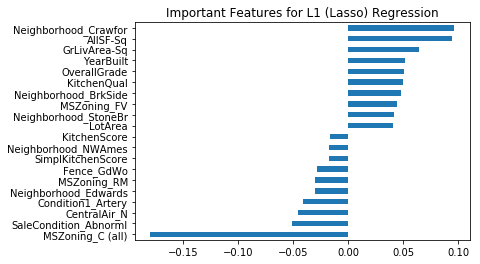

In [63]:
imp_coef = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coef.plot(kind = 'barh')
plt.title('Important Features for L1 (Lasso) Regression')
plt.show()

##### 4* Linear Regression with ElasticNet regularization (L1 and L2 penalty)

In [68]:
from sklearn.linear_model import ElasticNetCV

elasticnet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 100000, cv = 10)

##l1_ratio is the ratio of L1 and L2 regularization. 0 means only L2 is required. 1 means only L1 is required.

elasticnet.fit(X_train,y_train)

alpha = elasticnet.alpha_
l1ratio = elasticnet.l1_ratio_
print('Best alpha found till now', alpha)
print('Best L1 ratio  found till now', l1ratio)

Best alpha found till now 0.001
Best L1 ratio  found till now 0.8


In [70]:
ratio = l1ratio

In [71]:
elasticnet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 100000, cv = 10)

elasticnet.fit(X_train,y_train)

if elasticnet.l1_ratio_ > 1:
    elasticnet.l1_ratio_ = 1
    

alpha = elasticnet.alpha_
l1ratio = elasticnet.l1_ratio_
print('Best alpha found till now', alpha)
print('Best L1 ratio  found till now', l1ratio)

Best alpha found till now 0.001
Best L1 ratio  found till now 0.76


In [72]:
ratio = l1ratio

In [73]:
elasticnet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticnet.fit(X_train, y_train)
if (elasticnet.l1_ratio_ > 1):
    elasticnet.l1_ratio_ = 1    
alpha = elasticnet.alpha_
l1ratio = elasticnet.l1_ratio_

print("Best alpha :", alpha )
print("Best l1_ratio :", l1ratio)

Best alpha : 0.0010500000000000002
Best l1_ratio : 0.76


In [74]:
# Look at predictions on training and validation set
print('RMSE on Train Set:', rmse_cv_train_model(elasticnet).mean() )
print('RMSE on Valid Set:', rmse_cv_valid_model(elasticnet).mean() )

y_train_pred = elasticnet.predict(X_train)
y_valid_pred = elasticnet.predict(X_valid)

RMSE on Train Set: 0.11212727894684105
RMSE on Valid Set: 0.11900887511852573


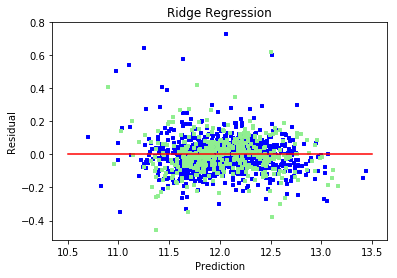

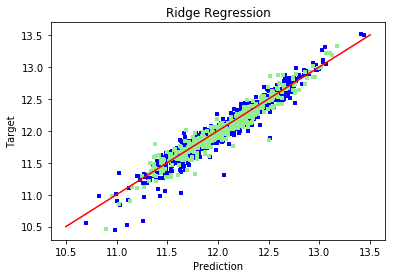

In [75]:
##PLot residual

plt.scatter(x = y_train_pred, y = y_train_pred - y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid_pred - y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [0.0, 0.0], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

##PLot target vs prediction

plt.scatter(x = y_train_pred, y = y_train, c = 'blue', marker = 's', label = 'Train Data', s=9)
plt.scatter(x= y_valid_pred, y = y_valid, c = 'lightgreen', marker = 's', label = 'Validation Data', s=9)
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.title('Ridge Regression')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

In [76]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train.columns)

print('Ridge takes ', sum(coefs!=0) , 'features and eliminated', sum(coefs ==0), 'features')

Ridge takes  97 features and eliminated 226 features


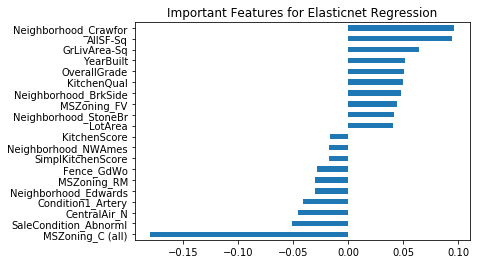

In [79]:
imp_coef = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coef.plot(kind = 'barh')
plt.title('Important Features for Elasticnet Regression')
plt.show()

## Another way (3rd way) to look at the same problem

In [102]:
## Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
## Linear, L1 , L2 and (both L1,L2) regression
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew,norm
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [103]:
pd.set_option('display.float_format', lambda x: '%0.2f' %x)

In [104]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')

In [105]:
print('Shape of Training set ', df_train.shape)
print('Shape of Testing set', df_test.shape)

Shape of Training set  (1460, 81)
Shape of Testing set (1459, 80)


In [106]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [107]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [108]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

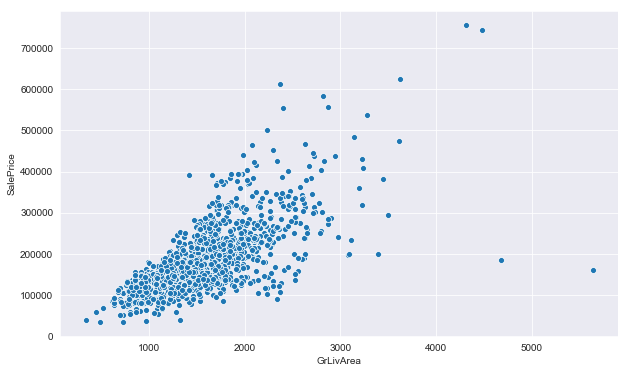

In [109]:
fig , ax = plt.subplots(figsize =(10,6))
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'])

In [110]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

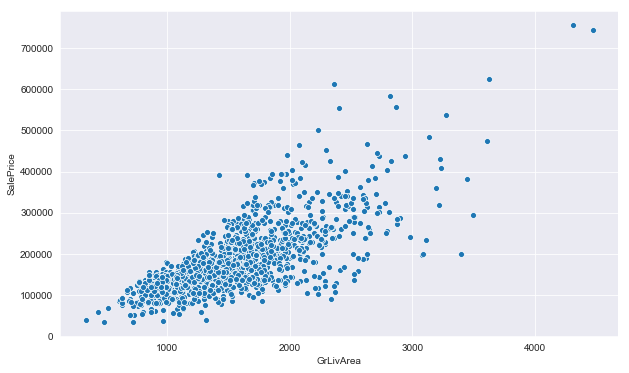

In [111]:
fig , ax = plt.subplots(figsize =(10,6))
sns.scatterplot(x = df_train['GrLivArea'], y = df_train['SalePrice'])

In [116]:
from scipy import stats

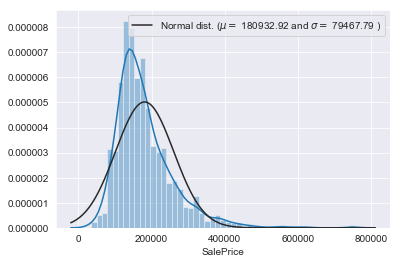

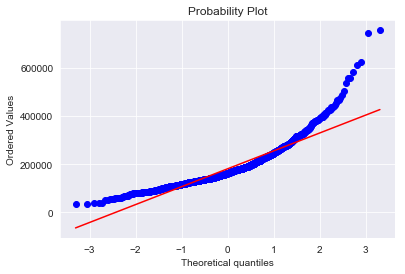

In [118]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [119]:
#Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



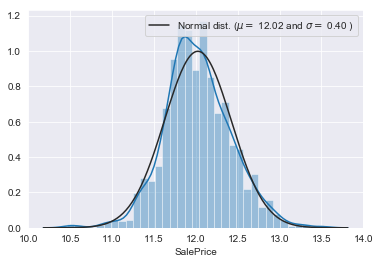

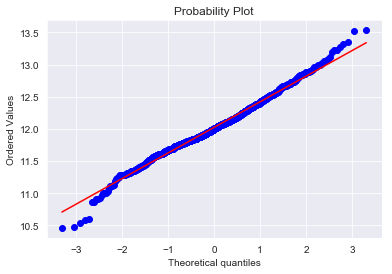

In [121]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
           
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [122]:
#Features engineering

In [127]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train['SalePrice'].values

all_data = pd.concat((df_train, df_test))
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.shape

(2917, 79)

*****log transformation is the special kind of box cox transformation where lambda is zero.******

Missing Data

#################################################################################################

In [203]:


#print(data.columns)

data.dropna(axis = 0 ,subset = ['SalePrice'], inplace = True)

y = data['SalePrice']
X = data.drop(['SalePrice'],axis =1).select_dtypes(exclude = ['object'])

train_x, valid_x , train_y, valid_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size = 0.20, 
                                                       shuffle = True, random_state = 1)

my_Imputer = Imputer()
train_x = my_Imputer.fit_transform(train_x)
valid_x = my_Imputer.transform(valid_x)



In [204]:
from xgboost import XGBRegressor

my_model = XGBRegressor()

my_model.fit(train_x, train_y, verbose = True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [205]:
train_pred = my_model.predict(train_x)
valid_pred  = my_model.predict(valid_x)


from sklearn.metrics import mean_absolute_error

print('Train Mean Absolute Error'+ str(mean_absolute_error(train_pred, train_y)))
print('Valid Mean Absolute Error'+ str(mean_absolute_error(valid_pred, valid_y)))

Train Mean Absolute Error31280.298801369863
Valid Mean Absolute Error28910.158256635274


In [207]:
#test = pd.read_csv('test.csv').select_dtypes(exclude =['object'])


#test_x = my_Imputer.transform()

test_matrix = df_test.as_matrix()
test_x = my_Imputer.transform(test_matrix)

preds = my_model.predict(test_x)

ValueError: could not convert string to float: 'RH'

In [15]:
print(len(preds))

1459


In [16]:
SalePrice = pd.Series(preds)

In [17]:
test['SalePrice'] = preds

In [18]:
test.head

<bound method NDFrame.head of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
5     1466          60         75.0    10000            6            5   
6     1467          20          NaN     7980            6            7   
7     1468          60         63.0     8402            6            5   
8     1469          20         85.0    10176            7            5   
9     1470          20         70.0     8400            4            5   
10    1471         120         26.0     5858            7            5   
11    1472         160         21.0     1680            6            5   
12    14

In [19]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
test.to_csv('house_price_submission.csv')

In [26]:
test[['Id','SalePrice']].to_csv('submission.csv',index = False)

In [27]:
! kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m 'Show the submission'

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: submission'
